<a href="https://colab.research.google.com/github/12264945/java-docs-spring-hello-world/blob/main/12264945-Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import pandas as pd
import random

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']
Dataset shape: (178, 13)
First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28       

<Figure size 1500x1000 with 0 Axes>

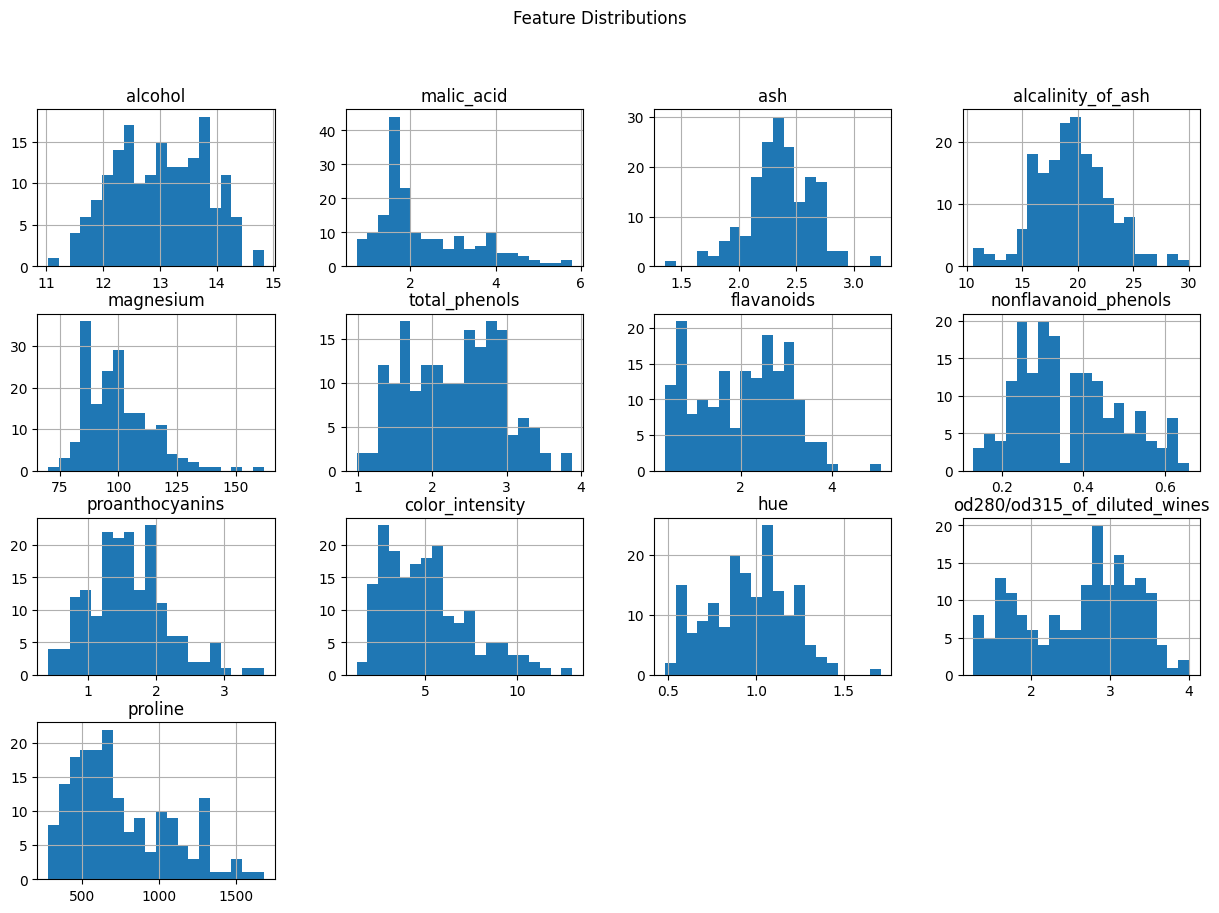

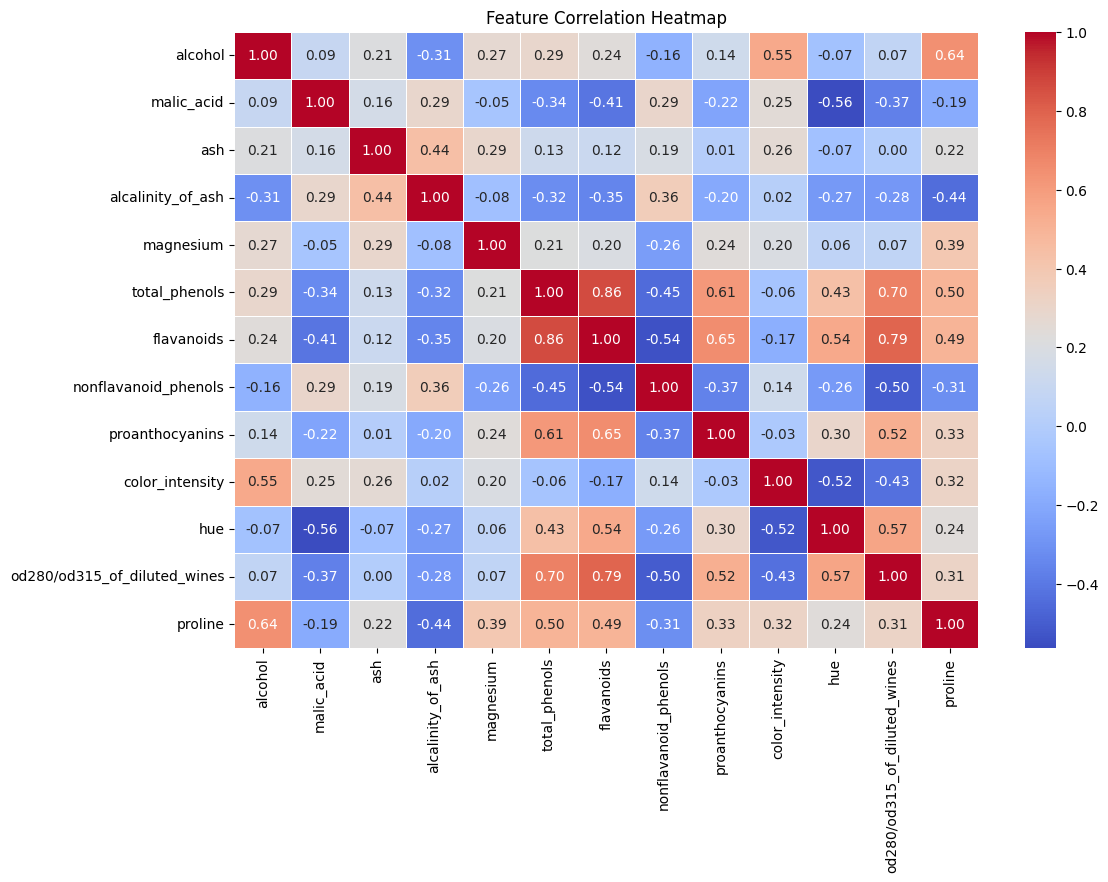

In [ ]:

# 1. Data Preprocessing
# Load Wine dataset
data = load_wine()
X = data.data
y = data.target

# Convert to DataFrame for better understanding
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Print basic information about the dataset
print(f"Features: {data.feature_names}")
print(f"Target names: {data.target_names}")
print(f"Dataset shape: {X.shape}")
print(f"First 5 rows of the dataset:\n{df.head()}")
# Plot distribution of each feature
plt.figure(figsize=(15, 10))
df.drop(columns='target').hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()
#Heatmap of feature correlations
corr = df.drop(columns='target').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the data to fit CNN input shape (adding a channel dimension)
X = X.reshape(X.shape[0], 13, 1, 1)  # 13 features, 1 channel (like grayscale)

# Convert labels to categorical
y = to_categorical(y, num_classes=3)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:

def create_cnn_model(filters=16, dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)),  # 1D Convolution layer, kernel size (2, 1)
        MaxPooling1D(2),  # MaxPooling layer
        Dropout(dropout_rate),
        Conv1D(64, 2, activation='relu'),
        MaxPooling1D(2),
        Dropout(dropout_rate),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Output layer for 3 classes
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:

# 3. Train CNN Model
cnn_model = create_cnn_model()
history_cnn = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3797 - loss: 1.1308 - val_accuracy: 0.5000 - val_loss: 1.0761
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3119 - loss: 1.1345 - val_accuracy: 0.5278 - val_loss: 1.0587
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3652 - loss: 1.0973 - val_accuracy: 0.4444 - val_loss: 1.0464
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4913 - loss: 1.0484 - val_accuracy: 0.4444 - val_loss: 1.0324
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4334 - loss: 1.1103 - val_accuracy: 0.5833 - val_loss: 1.0200
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4516 - loss: 1.0541 - val_accuracy: 0.5833 - val_loss: 1.0075
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3794 - loss: 1.0732 - val_accuracy: 0.6389 - val_loss: 0.9939
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4745 - loss: 0.9969 - val_accuracy: 0.6667 - val_loss: 0.9824
Epoch 9/10


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8183 - loss: 0.9529


CNN Test Accuracy: 0.8056
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


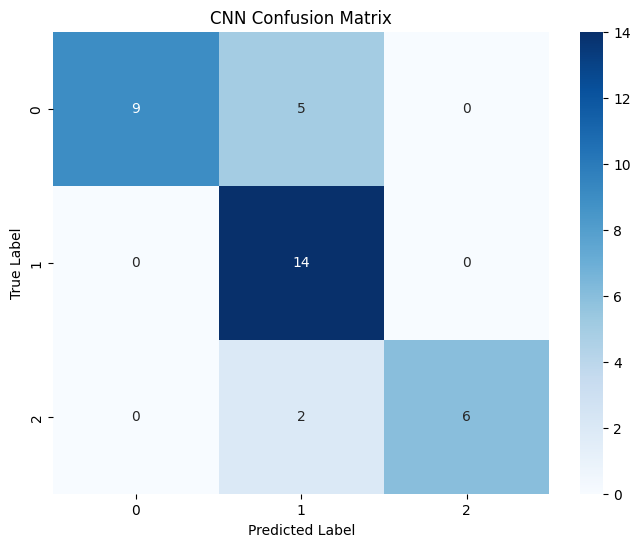

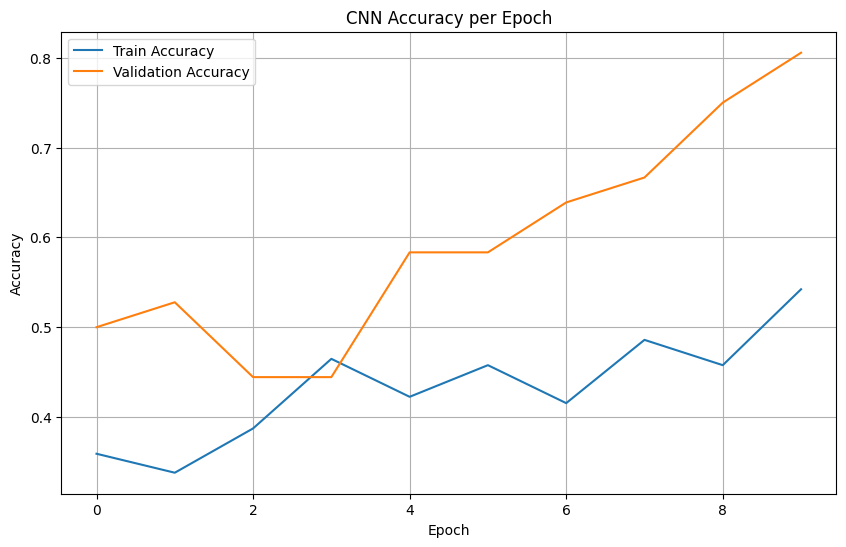

In [ ]:

# 4. Evaluate CNN Model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

# Confusion Matrix for CNN
cnn_predictions = cnn_model.predict(X_test)
cnn_y_pred = np.argmax(cnn_predictions, axis=1)
cnn_y_true = np.argmax(y_test, axis=1)
cnn_conf_matrix = confusion_matrix(cnn_y_true, cnn_y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(cnn_y_true), yticklabels=np.unique(cnn_y_true))
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot CNN accuracy

plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


In [ ]:
# 5. PSO for Hyperparameter Tuning
# PSO setup
SWARM_SIZE = 10
DIMENSIONS = 3  # [filters, learning rate, dropout rate]
INFORMANTS = 3
NUM_GENERATIONS = 20
W = 0.729
C1 = 1.49
C2 = 1.49
MIN_BOUNDARY = [16, 0.0001, 0.2]  # Min filters, learning rate, dropout rate
MAX_BOUNDARY = [128, 0.01, 0.5]  # Max filters, learning rate, dropout rate
desired_precision = 1e-5

# Fitness function to evaluate the CNN model's performance
def fitness_function(position):
    filters = int(position[0])
    learning_rate = position[1]
    dropout_rate = position[2]

    model = create_cnn_model( dropout_rate, learning_rate)
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

    # Evaluate on test set
    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)
    return 1 - val_acc

class Particle:
    def __init__(self):
        self.position = [
            random.uniform(MIN_BOUNDARY[0], MAX_BOUNDARY[0]),
            random.uniform(MIN_BOUNDARY[1], MAX_BOUNDARY[1]),
            random.uniform(MIN_BOUNDARY[2], MAX_BOUNDARY[2])
        ]
        self.velocity = [random.uniform(-1, 1) for _ in range(DIMENSIONS)]
        self.fitness = fitness_function(self.position)
        self.best_position = list(self.position)
        self.best_fitness = self.fitness
        self.informants = random.sample(range(SWARM_SIZE), INFORMANTS)
        self.group_best_position = list(self.position)
        self.group_best_fitness = self.fitness

    def update_velocity(self):
        for d in range(DIMENSIONS):
            r1, r2 = random.random(), random.random()
            cognitive = C1 * r1 * (self.best_position[d] - self.position[d])
            social = C2 * r2 * (self.group_best_position[d] - self.position[d])
            self.velocity[d] = W * self.velocity[d] + cognitive + social

    def update_position(self):
        for d in range(DIMENSIONS):
            self.position[d] += self.velocity[d]
            self.position[d] = max(MIN_BOUNDARY[d], min(MAX_BOUNDARY[d], self.position[d]))
        self.fitness = fitness_function(self.position)

    def update_group_best(self, swarm):
        best_informant = min(
            self.informants,
            key=lambda i: swarm[i].best_fitness
        )
        if swarm[best_informant].best_fitness < self.group_best_fitness:
            self.group_best_fitness = swarm[best_informant].best_fitness
            self.group_best_position = list(swarm[best_informant].best_position)

# Initialize the PSO swarm
swarm = [Particle() for _ in range(SWARM_SIZE)]
global_best = min(swarm, key=lambda p: p.best_fitness)
global_best_position = list(global_best.best_position)
global_best_fitness = global_best.best_fitness

# Main PSO loop
for gen in range(NUM_GENERATIONS):
    for particle in swarm:
        particle.update_group_best(swarm)
        particle.update_velocity()
        particle.update_position()
        if particle.fitness < particle.best_fitness:
            particle.best_fitness = particle.fitness
            particle.best_position = list(particle.position)
    best_particle = min(swarm, key=lambda p: p.best_fitness)
    if best_particle.best_fitness < global_best_fitness:
        global_best_fitness = best_particle.best_fitness
        global_best_position = list(best_particle.best_position)

    print(f"Generation {gen+1}: Best Accuracy = {1 - global_best_fitness:.4f}")

    if global_best_fitness < desired_precision:
        print("Desired precision reached.")
        break

print("\nOptimization Complete!")
print(f"Best Filters: {int(global_best_position[0])}")
print(f"Best Learning Rate: {global_best_position[1]:.5f}")
print(f"Best Dropout Rate: {global_best_position[2]:.5f}")
print(f"Best Validation Accuracy: {1 - global_best_fitness:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Generation 1: Best Accuracy = 0.9167
Generation 2: Best Accuracy = 0.9167
Generation 3: Best Accuracy = 0.9167
Generation 4: Best Accuracy = 0.9167
Generation 5: Best Accuracy = 0.9167
Generation 6: Best Accuracy = 0.9167
Generation 7: Best Accuracy = 0.9167
Generation 8: Best Accuracy = 0.9167
Generation 9: Best Accuracy = 0.9167
Generation 10: Best Accuracy = 0.9167
Generation 11: Best Accuracy = 0.9167
Generation 12: Best Accuracy = 0.9167
Generation 13: Best Accuracy = 0.9444
Generation 14: Best Accuracy = 0.9444
Generation 15: Best Accuracy = 0.9444
Generation 16: Best Accuracy = 0.9444
Generation 17: Best Accuracy = 0.9444
Generation 18: Best Accuracy = 0.9444
Generation 19: Best Accuracy = 0.9444
Generation 20: Best Accuracy = 0.9444

Optimization Complete!
Best Filters: 82
Best Learning Rate: 0.00532
Best Dropout Rate: 0.20488
Best Validation Accuracy: 0.9444


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4239 - loss: 1.0455 - val_accuracy: 0.5833 - val_loss: 0.8267
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6028 - loss: 0.8264 - val_accuracy: 0.8056 - val_loss: 0.5802
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7009 - loss: 0.6920 - val_accuracy: 0.8056 - val_loss: 0.4450
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8013 - loss: 0.4812 - val_accuracy: 0.7778 - val_loss: 0.4317
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7575 - loss: 0.5701 - val_accuracy: 0.8889 - val_loss: 0.3217
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8262 - loss: 0.3992 - val_accuracy: 0.8611 - val_loss: 0.3159
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7805 - loss: 0.4540 - val_accuracy: 0.8889 - val_loss: 0.2421
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8725 - loss: 0.3126 - val_accuracy: 0.9167 - val_loss: 0.1790


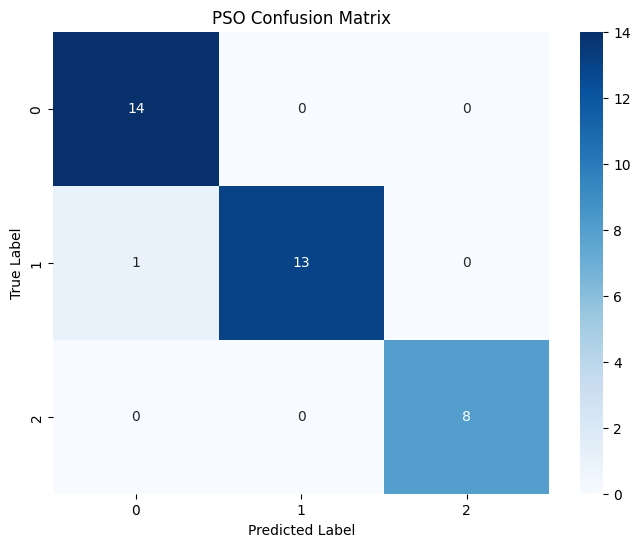

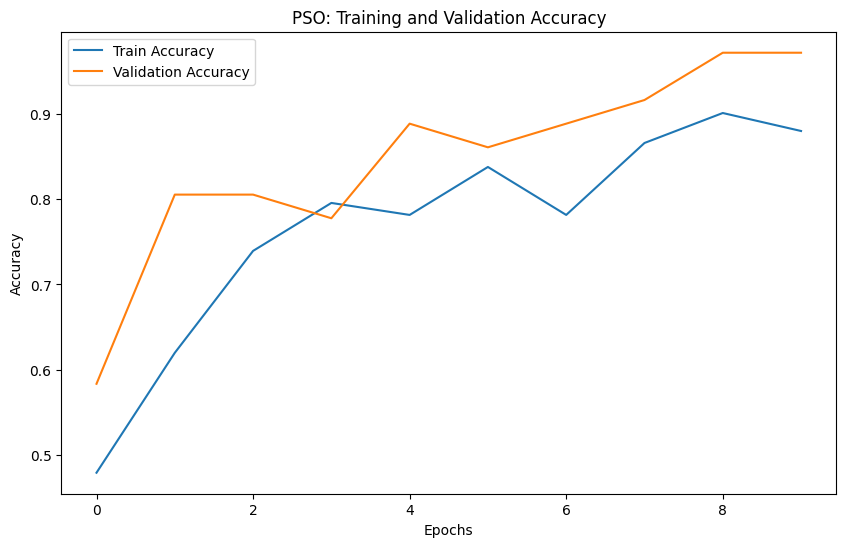

In [ ]:
# 6. Evaluate the final model from PSO
final_model = create_cnn_model(int(global_best_position[0]), global_best_position[2], global_best_position[1])

# Train the model with the best hyperparameters
history_pso = final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate on the test set
pso_test_loss, pso_test_acc = final_model.evaluate(X_test, y_test, verbose=1)
print(f"PSO Test Accuracy: {pso_test_acc:.4f}")

# Confusion Matrix for PSO
pso_predictions = final_model.predict(X_test)
pso_y_pred = np.argmax(pso_predictions, axis=1)
pso_y_true = np.argmax(y_test, axis=1)
pso_conf_matrix = confusion_matrix(pso_y_true, pso_y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pso_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(pso_y_true), yticklabels=np.unique(pso_y_true))
plt.title('PSO Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot PSO accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_pso.history['accuracy'], label='Train Accuracy')
plt.plot(history_pso.history['val_accuracy'], label='Validation Accuracy')
plt.title('PSO: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



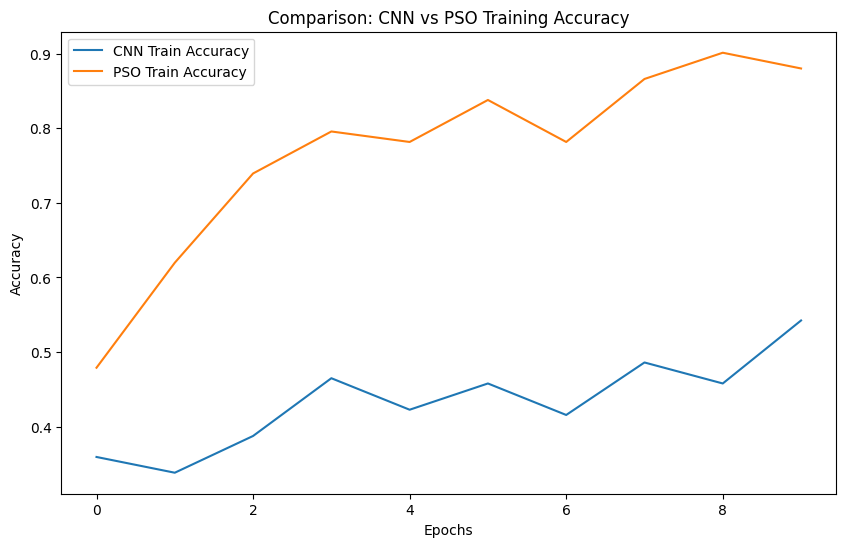

In [ ]:

# 7. Comparison of CNN and PSO models

# Plot Comparison of CNN and PSO Training Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_pso.history['accuracy'], label='PSO Train Accuracy')
plt.title('Comparison: CNN vs PSO Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()